In [1]:
import glob
import random
import argparse
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import rescale, resize, downscale_local_mean, rotate
from skimage import exposure
import random
import os
import numpy as np
from scipy.misc import imresize
from PIL import Image
import itertools
import random 
from PIL import Image

%matplotlib inline

import warnings
warnings.simplefilter("ignore", UserWarning)

--- 

In [9]:
def resize(img, target_size, perserve_range=False):
    w, h = img.shape[0], img.shape[1]
    tw, th = target_size[0], target_size[1]

    # scale 
    scale = float(max(tw, th)) / float(min(w, h))
    scaled_img = rescale(img, scale, preserve_range=perserve_range)

    # crop 
    x1 = int((scaled_img.shape[0] - tw) / 2) 
    y1 = int((scaled_img.shape[1] - th) / 2) 
    x2 = x1 + tw 
    y2 = y1 + th

    if len(scaled_img.shape) == 2:
        #scaled_img = np.expand_dims(scaled_img, axis=2)
        cropped_img = scaled_img[x1:x2, y1:y2]
    else:            
        cropped_img = scaled_img[x1:x2, y1:y2, :]

    return cropped_img

In [54]:
def normalize(img):
    img = img.astype(np.float32)    

    if img.max() > 100:
        img = img / 255.

    return img

In [20]:
def prepare_img(x, target_size):
    x = normalize(resize(x, target_size))
    if len(x.shape) == 2:
        x = np.expand_dims(x, axis=2)
            
    return x 

In [67]:
def load_img(img_path, target_size=(448, 448)):
    img = imread(img_path, as_grey=False, mode='RGB')
    if img.shape[2] == 4:
        img = img[:,:,:3]
    return prepare_img(img, target_size)

--- 

In [60]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    
    import coremltools

In [61]:
model =  coremltools.models.MLModel('../../../CoreMLModels/Chapter9/small_unet.mlmodel')

In [62]:
model.output_description

Features(output)

In [68]:
x = load_img('testimage.png')

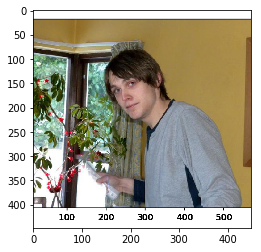

In [69]:
plt.imshow(x)

In [77]:
x = Image.fromarray(np.uint8(x*255))

In [78]:
y_hat = model.predict({'image':x})

In [84]:
pix = np.array(y_hat['output'])

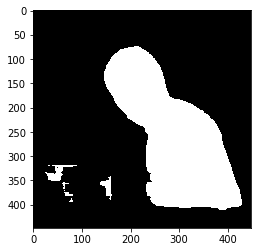

In [86]:
plt.imshow(pix, cmap='gray')